## 2023 07/17 Exploratory Data Analysis

*Last Updated*: 2023-07-16

### Authors
* April Zhang (april.zhang@berkeley.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* edge detection to genearte a hand outline and separate foreground from background

* image cropping

### Key Results

The key results of this experiment are ...

In [248]:
### Importing libraries

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFilter
import skimage

### Canny Edge Detection

In [260]:
def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        print("read" + filename)
        if img is not None:
            images.append(img)
    return images
img_list = load_images_from_folder("/Users/aprilzhang/Downloads/test-images/")

read16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg
read7F301A45-1207-4B6A-A05A-72B320B25E95.jpeg
read6C550AAE-8181-41AA-829C-B42D255A9E2F.jpeg
read5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg
readimage007.jpg
readE4FE4EBA-68AA-434C-8260-54646D0C4AC3.jpeg


In [261]:
len(img_list)

6

In [202]:
#displaying images
#for image in img_list:
 #   cv2.imshow("", image)
 #  cv2.waitKey(0)

In [262]:
def canny_edge(img_list, show = False):
    for im in img_list: 
        #low_threshold = 0
        #high_threshold = 200
        #sigma = 2
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        wide = cv2.Canny(blurred, 15, 150) #can play around with these numbers to change range
        #mid = cv2.Canny(blurred, 30, 150)
        #tight = cv2.Canny(blurred, 240, 250)
        #edges = skimage.feature.canny(image=gray,sigma=sigma,low_threshold=low_threshold,high_threshold=high_threshold,)
        if show: 
            plt.subplot(121),plt.imshow(gray, cmap = "gray")
            plt.title('Original Image'), plt.xticks([]), plt.yticks([])
            plt.subplot(122),plt.imshow(wide, cmap = "gray")
            plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
            plt.show()

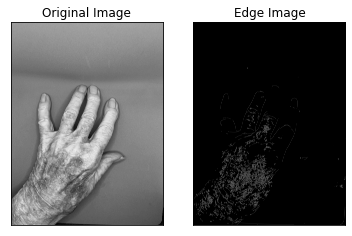

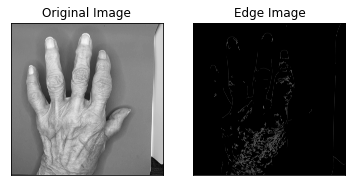

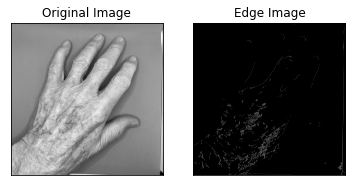

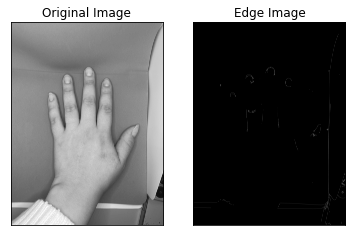

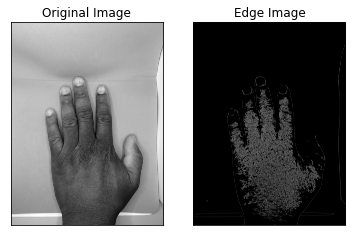

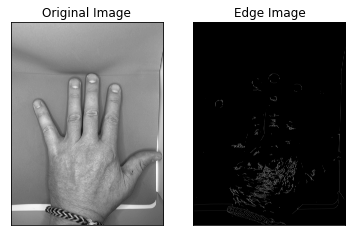

In [263]:
canny_edge(img_list, True)

### Otsu Thresholding

In [264]:
def otsu_thresholding(img_list, show = False):
    for im in img_list: 
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        ret, mask = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        thresholded = cv2.bitwise_and(gray, mask)
        if show: 
            plt.subplot(121),plt.imshow(mask, cmap = "gray")
            plt.title('Mask'), plt.xticks([]), plt.yticks([])
            plt.subplot(122),plt.imshow(thresholded, cmap = "gray")
            plt.title('Mask + Image'), plt.xticks([]), plt.yticks([])
            plt.show()

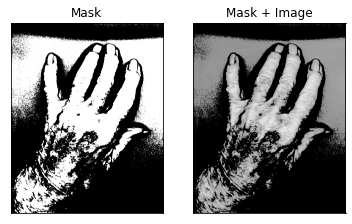

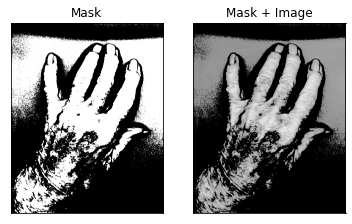

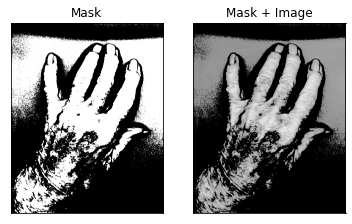

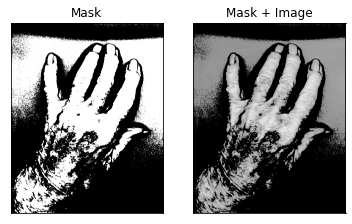

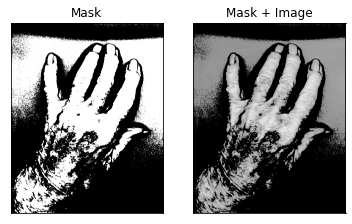

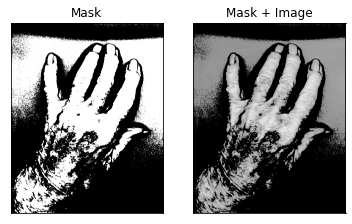

In [265]:
otsu_thresholding(img_list, True)

### Cropping Images with PIL's .crop function (consider using 

In [266]:
pil_im = Image.fromarray(img_list[0])
width, height = im.size
print(width, height)                      

3024 4032


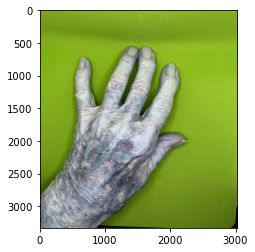

In [267]:
crop_im = pil_im.crop((0, 700, 3024, 4032)) #figure out if 100-200 pixels from each edge size will work for all images
plt.imshow(crop_im, cmap = "gray")

In [268]:
L_im = crop_im.convert("L")
image = L_im.filter(ImageFilter.FIND_EDGES)
image.show()

In [244]:
final = L_im.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,
                                          -1, -1, -1, -1), 1, 0))
final.show()

### To-do 07/18/22
- Try foreground background separation by greenscreen color (direct color separation)
- Find bounding box for hand (will help with cropping- water something algorithm)
- Future: Running edge detection after background separation for ML prediction